<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

**step1**: import libraries

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Prepare Data

**step2** : read data and describe that  

In [103]:
bike_train=pd.read_csv('train.csv')
bike_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [104]:
bike_test=pd.read_csv('test.csv')
bike_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


## EDA

In [105]:
bike_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [106]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [107]:
bike_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [108]:
bike_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [109]:
bike_train.shape

(10886, 12)

In [110]:
x=bike_train[[ 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual']]
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual
0,1,0,0,1,9.84,14.395,81,0.0000,3
1,1,0,0,1,9.02,13.635,80,0.0000,8
2,1,0,0,1,9.02,13.635,80,0.0000,5
3,1,0,0,1,9.84,14.395,75,0.0000,3
4,1,0,0,1,9.84,14.395,75,0.0000,0
...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7
10882,4,0,1,1,14.76,17.425,57,15.0013,10
10883,4,0,1,1,13.94,15.910,61,15.0013,4
10884,4,0,1,1,13.94,17.425,61,6.0032,12


In [111]:
y=bike_train[['count']]
y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


**i underestood that bike_train dataframe not have a Missing Value**

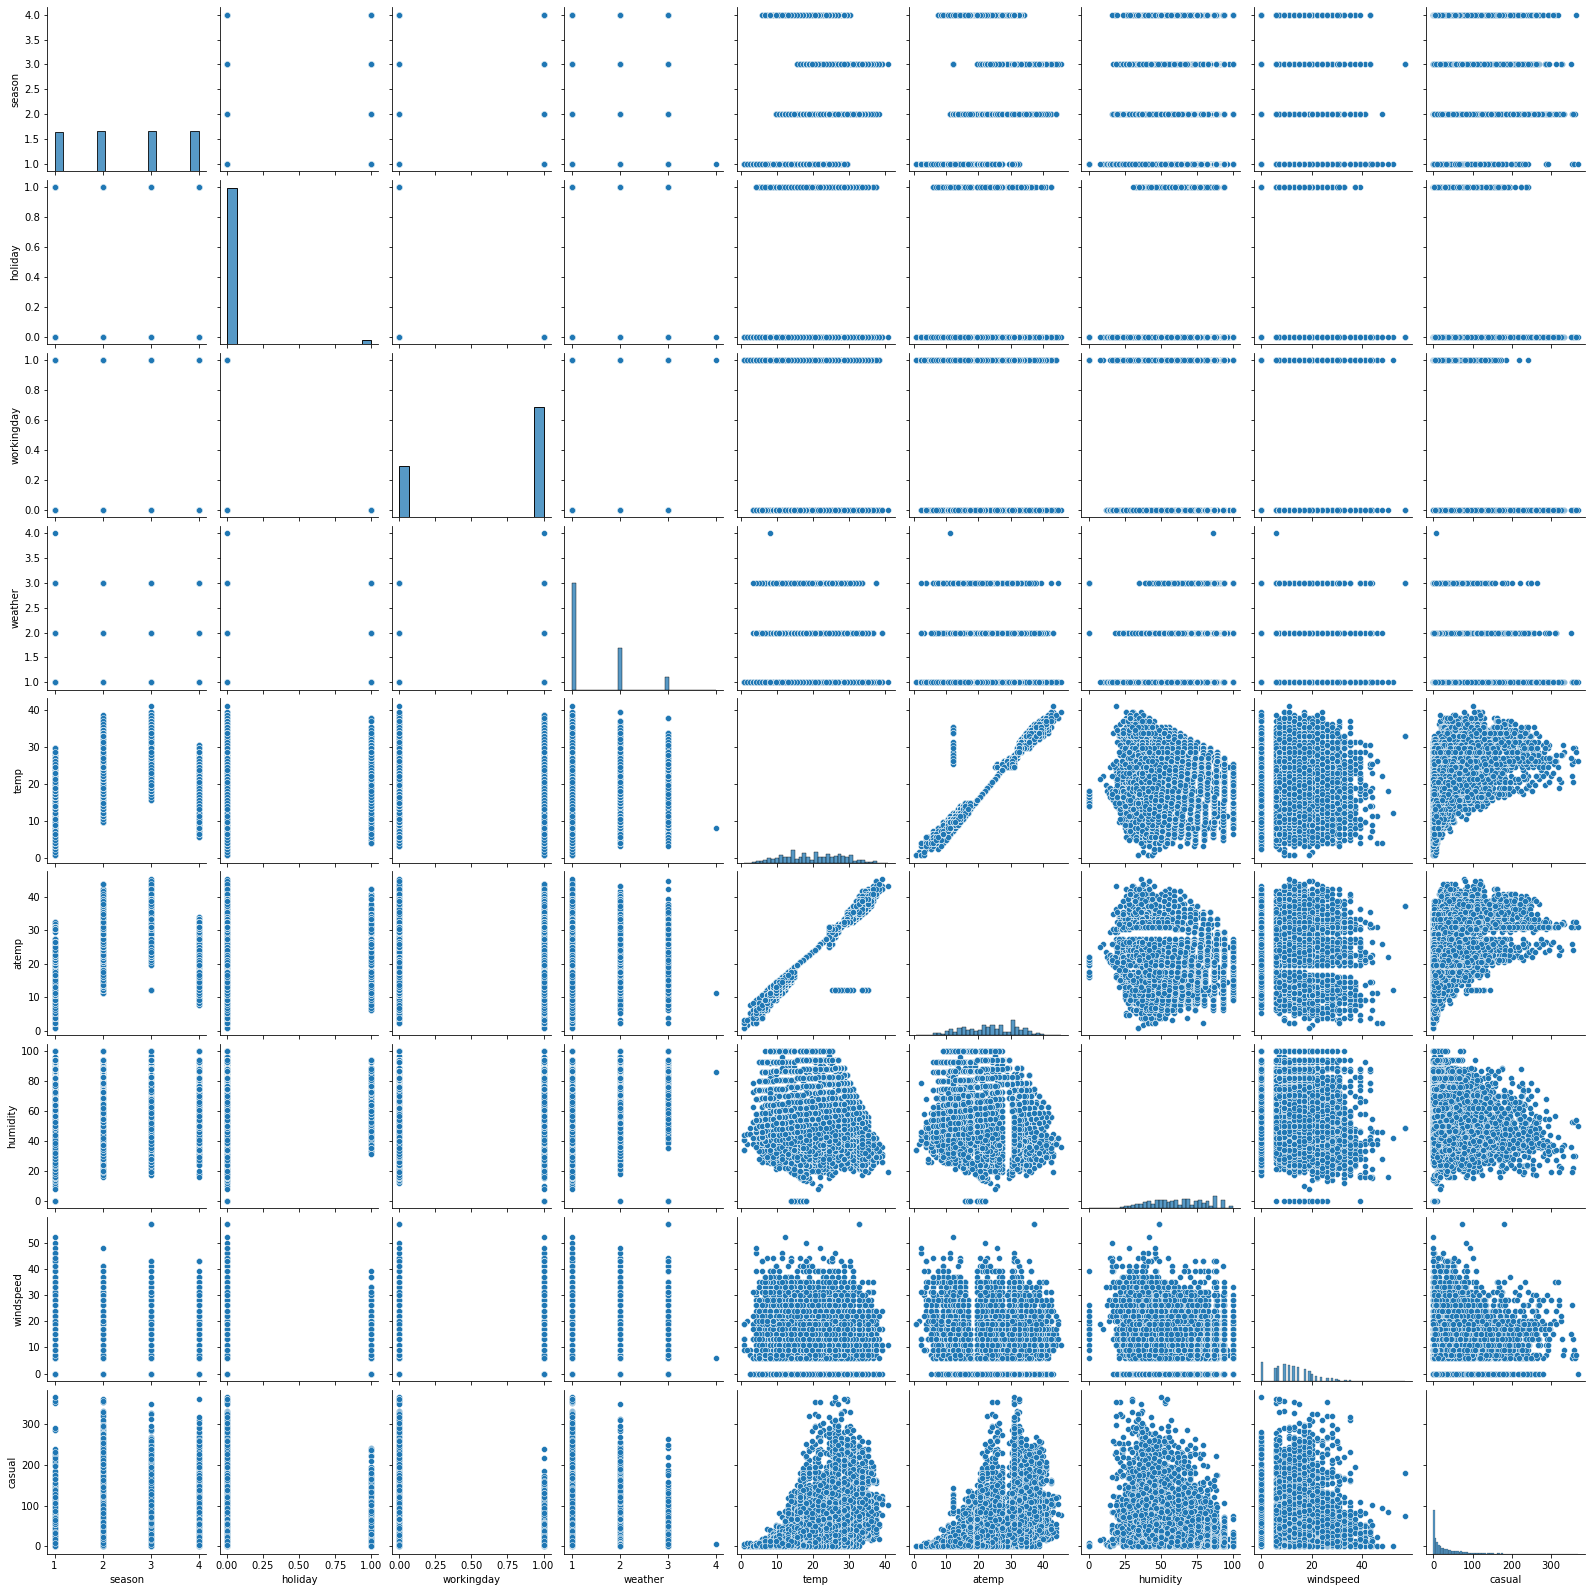

In [112]:
sns.pairplot(x)

## Data Preprocessing

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=27)

In [114]:
print(x_train.shape)
print(y_train.shape)

(7620, 9)
(7620, 1)


In [115]:
print(x_test.shape)
print(y_test.shape)

(3266, 9)
(3266, 1)


In [116]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_train=SC.fit_transform(x_train)
x_test=SC.fit_transform(x_test)

In [117]:
x_train

array([[ 0.44769262, -0.17080228, -1.45659584, ..., -0.40674356,
         0.76385132,  0.60181797],
       [ 0.44769262, -0.17080228, -1.45659584, ...,  0.6254561 ,
         0.5181171 ,  1.36481162],
       [-1.35062987, -0.17080228, -1.45659584, ..., -0.76801344,
        -1.56692544, -0.44227862],
       ...,
       [ 0.44769262, -0.17080228,  0.68653224, ...,  0.83189603,
        -0.83054463, -0.70330276],
       [ 0.44769262, -0.17080228,  0.68653224, ...,  1.65765576,
         0.02747051, -0.6631452 ],
       [ 1.34685387, -0.17080228,  0.68653224, ...,  0.10935627,
         0.27320473, -0.72338154]])

In [118]:
x_test

array([[ 1.31777200e+00, -1.73086694e-01,  6.80151718e-01, ...,
         1.69553255e+00, -8.36886962e-01, -7.15666070e-01],
       [ 1.31777200e+00, -1.73086694e-01,  6.80151718e-01, ...,
         2.01244424e+00, -4.71274410e-01, -2.98307786e-01],
       [-4.59574006e-01, -1.73086694e-01,  6.80151718e-01, ...,
        -1.00300384e-01,  8.71758723e-01, -6.95791866e-01],
       ...,
       [ 1.31777200e+00, -1.73086694e-01, -1.47026020e+00, ...,
        -7.86942387e-01, -2.26714783e-01,  4.69011742e+00],
       [-4.59574006e-01, -1.73086694e-01,  6.80151718e-01, ...,
        -1.05103547e+00,  2.61586545e-01, -1.94725820e-04],
       [-4.59574006e-01, -1.73086694e-01,  6.80151718e-01, ...,
         1.63792694e-01, -2.26714783e-01,  6.15905598e-01]])

## Strorytelling - Visualization

now we find correlation between features

In [119]:
corr=bike_train.corr()
corr.shape

(11, 11)

<AxesSubplot:>

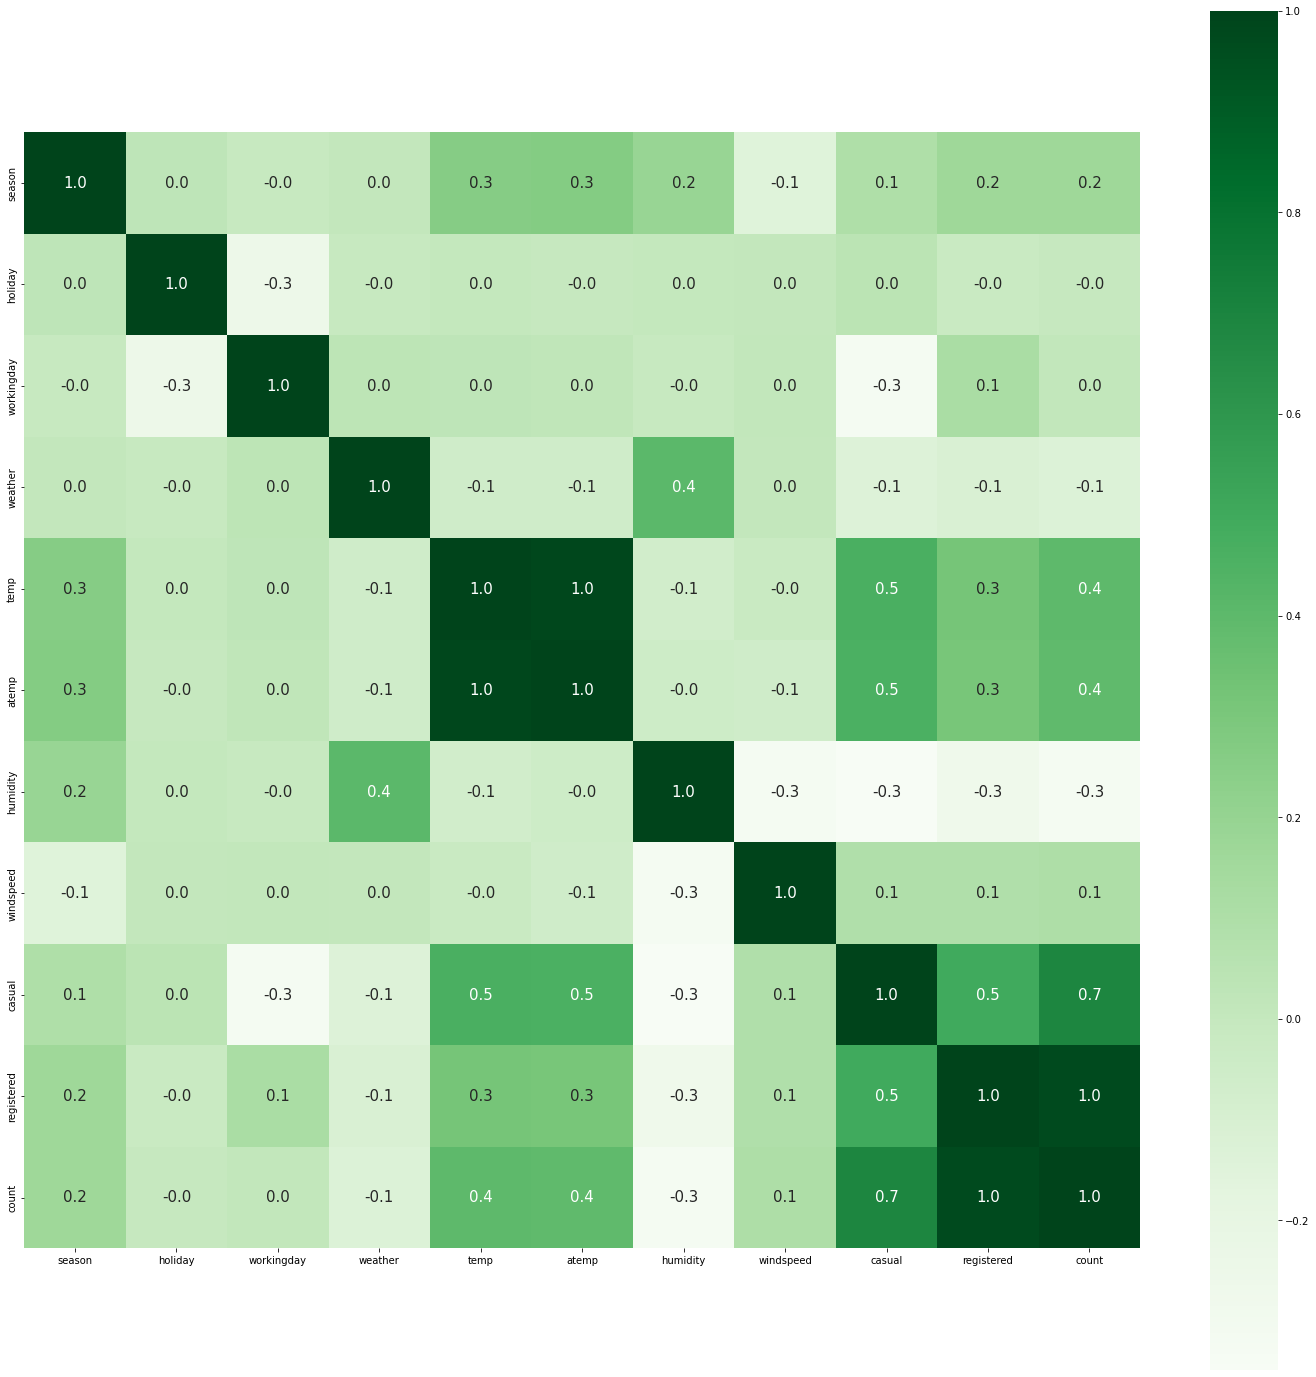

In [120]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

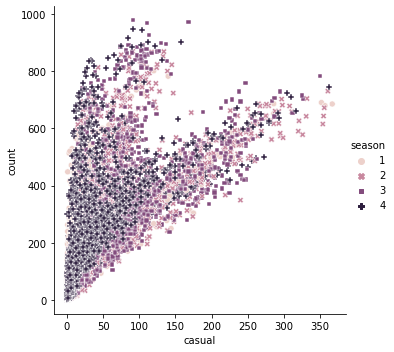

In [121]:
sns.relplot(bike_train,x='casual',y='count',hue="season",style="season")

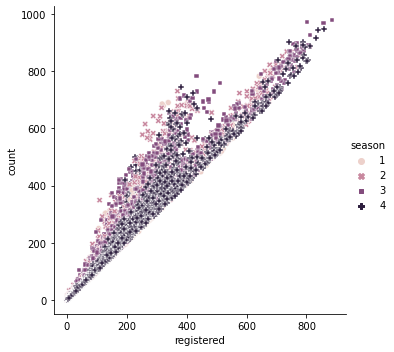

In [122]:
sns.relplot(bike_train,x='registered',y='count',hue="season",style="season")

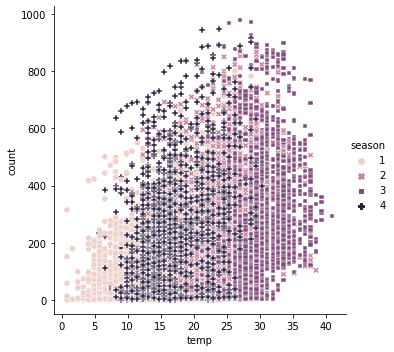

In [123]:
sns.relplot(bike_train,x='temp',y="count",hue="season",style="season")

## Train your model (Regression)

* multiple linear regression

In [125]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [126]:
LR.intercept_

array([190.58490814])

In [127]:
LR.coef_

array([[ 19.14668631,   5.22157843,  43.74912603,  -2.53579314,
        -14.36407866,  18.37890982, -12.77404298,   4.96352143,
        130.71190999]])

In [128]:
# Model prediction on train data
y_pred = LR.predict(x_train)

In [129]:
from sklearn import metrics

In [130]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5569878376445343
MAE: 85.05430480362337
MSE: 14503.555541439111
RMSE: 120.43070846523784


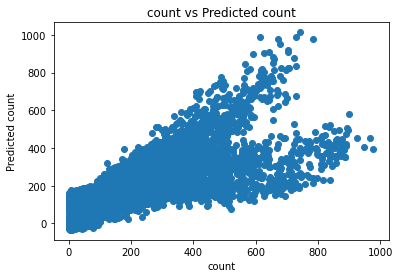

In [131]:
plt.scatter(y_train, y_pred)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

* Polynomial  linear regression

In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [133]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
x_train_quadratic = poly_features.fit_transform(x_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(x_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(x_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(x_test))

In [134]:
metrics.r2_score(y_train, y_train_predicted)

0.6404117834594315

In [135]:
metrics.r2_score(y_test, y_test_predicted)

-8.479478864067622e+20

In [136]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=6)
   
# transform the features to higher degree features.
x_train_quadratic = poly_features.fit_transform(x_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(x_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(x_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(x_test))

In [137]:
metrics.r2_score(y_train, y_train_predicted)

0.802575131968065

In [138]:
metrics.r2_score(y_test, y_test_predicted)

-5.1742905230005306e+17

## Test Result

* 1 : casual + registered = count 	
* 2 : the best parameter that have a good correlation with count(model outpot=y)are casual, registered,temp and  atemp in order
* 3 : withot consideration of registered columns, the  value metrics for analysis of model performance decreases.
* 4 : polynomial linear regression have a good performance in R^2 metrics for degree > 6
* 5 : we can delete all columns except 4 columns casual, registered,temp and  atemp in order. because we find a good relation between this parameter and model outpot(count)

## Send us the Result (Maktabkhoone)